## Time Series Interactive Tool

In this tutorial we will explore the different functionalities of Time Series Interactive Tool.

In [26]:
%matplotlib widget

import numpy as np
from tvb.simulator.lab import *
from tvb.simulator.plot.timeseries_interactive import TimeSeriesInteractive

LOG = get_logger('demo')

In [27]:
def generate_region_demo_data():
    """
    Generate 16 seconds of 2048Hz data at the region level, stochastic integration.
    
    ``Run time``: approximately 4 minutes (workstation circa 2010)
    
    ``Memory requirement``: < 1GB
    ``Storage requirement``: ~ 19MB
    
    .. moduleauthor:: Stuart A. Knock <stuart.knock@gmail.com>
    
    """
    
   
    ##----------------------------------------------------------------------------##
    ##-                      Perform the simulation                              -##
    ##----------------------------------------------------------------------------##
    
    LOG.info("Configuring...")
    
    #Initialise a Model, Coupling, and Connectivity.
    pars = {'a': np.array([1.05]),
            'b': np.array([-1.]),
            'c': np.array([0.0]),
            'd': np.array([0.1]),
            'e': np.array([0.0]),
            'f': np.array([1 / 3.]),
            'g': np.array([1.0]),
            'alpha': np.array([1.0]),
            'beta': np.array([0.2]),
            'tau': np.array([1.25]),
            'gamma': np.array([-1.0])}
    
    oscillator = models.Generic2dOscillator(**pars)
    
    white_matter = connectivity.Connectivity().from_file()
    white_matter.speed = np.array([4.0])
    white_matter_coupling = coupling.Linear(a=np.array([0.033]))
    
    
    #Initialise an Integrator
    hiss = noise.Additive(nsig=np.array([2 ** -10, ]))
    heunint = integrators.HeunStochastic(dt=0.06103515625, noise=hiss) 
    
    #Initialise a Monitor with period in physical time
    what_to_watch = [monitors.TemporalAverage(period=0.48828125)]     # 2048Hz => period=1000.0/2048.0
    
    #Initialise a Simulator -- Model, Connectivity, Integrator, and Monitors.
    sim = simulator.Simulator(model=oscillator, connectivity=white_matter,
                              coupling=white_matter_coupling,
                              integrator=heunint, monitors=what_to_watch)
    
    sim.configure()
    
    #Perform the simulation
    tavg_data = []
    tavg_time = []
    LOG.info("Starting simulation...")
    for tavg in sim(simulation_length=16000):
        if tavg is not None:
            tavg_time.append(tavg[0][0])    # TODO:The first [0] is a hack for single monitor
            tavg_data.append(tavg[0][1])    # TODO:The first [0] is a hack for single monitor
    
    LOG.info("Finished simulation.")
    
    
    ##----------------------------------------------------------------------------##
    ##-                     Save the data to a file                              -##
    ##----------------------------------------------------------------------------##
    
    #Make the list a numpy.array.
    LOG.info("Converting result to array...")
    TAVG = np.array(tavg_data)
    
    #Save it
    FILE_NAME = "demo_data_region_16s_2048Hz.npy"
    LOG.info("Saving array to %s..." % FILE_NAME)
    np.save(FILE_NAME, TAVG)
    
    LOG.info("Done.")

In [28]:
generate_region_demo_data()

WARNING  File 'hemispheres' not found in ZIP.


In [29]:
#Load the demo data
data = np.load("demo_data_region_16s_2048Hz.npy")
period = 0.00048828125 #NOTE: Providing period in seconds

#Create a TVB TimeSeries object
import tvb.datatypes.time_series
tsr = tvb.datatypes.time_series.TimeSeriesRegion()
tsr.data = data
tsr.sample_period = period

from tvb.datatypes.connectivity import Connectivity
tsr.connectivity = Connectivity.from_file()


tsi = TimeSeriesInteractive(time_series=tsr)
tsi.configure()

WARNING  File 'hemispheres' not found in ZIP.


   INFO  Generating an interactive time-series plot for TimeSeriesRegion


GridBox(children=(Output(layout=Layout(border='solid 1px black', margin='3px 3px 3px 3px', padding='2px 2px 2p…

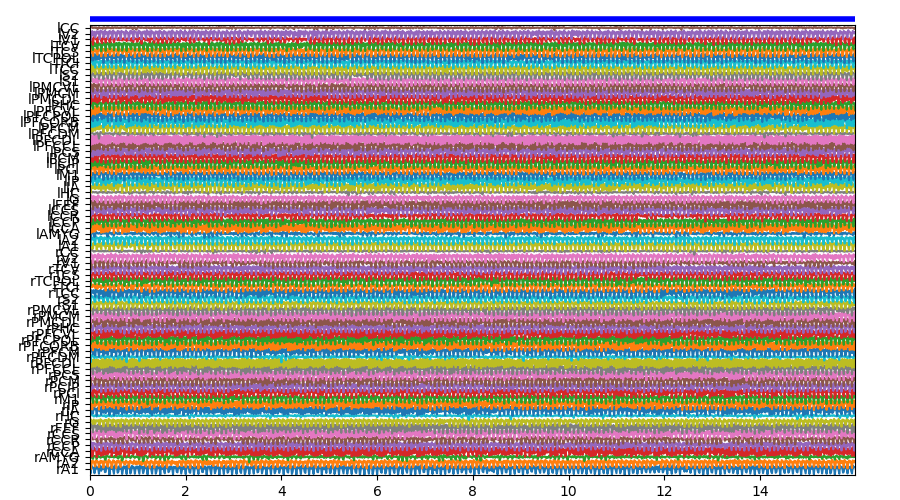

In [30]:
tsi.show()

As you can see in the output above, the control panel consists of Window Length Slider, Time Series Viewer Control Buttons, Spacing slider and Space Label Selection checkboxes.

### Let's explore each functionality one by one

##### Space Label Selection Checkboxes

<p>These checkboxes select/unselect the various space labels of the time series. Primary purpose of these checkboxes is to observe specific space labels clearly.</p>

<p><b>Try it out yourself:</b> Unselect all labels and select rA1, rA2, rIA and rIP only.</p>

##### Window Length Slider

<p>This slider determines the length of the window to observe the TimeSeries. The main use of this slider is to observe the small changes occuring in the Time Series in contrast to the overall waveform.</p>

<p><b>Try it out yourself:</b> Change the window length to 2, to observe the timeseries clearly.</p>

##### Spacing Slider

<p>This slider alters the spacing between two time series.</p>

<p><b>Try it out yourself:</b> Increase the spacing between different time series to 0.8 using the Spacing Slider.</p>

##### Time Series Viewer Buttons

These buttons help to navigate within the TimeSeries by moving the window by either 0.25 sec or 0.5 sec.
- The '<' and '>' buttons step 0.25 sec backward and forward in time respectively.
- The '<<' and '>>' buttons step 0.5 sec backward and forward in time respectively.
- The '|<<' and '>>|' buttons navigate to the beginning and end of the TimeSeries respectively.

<p><b>Try it out yourself:</b> Navigate forward in time and observe the Time Series.</p>